<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/diffusioncoefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Diffusion coefficient
#@markdown Diffusivity, mass diffusivity or diffusion coefficient is a proportionality constant between the molar flux due to molecular diffusion and the gradient in the concentration of the species (or the driving force for diffusion). Diffusivity is encountered in Fick's law and numerous other equations of physical chemistry.
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

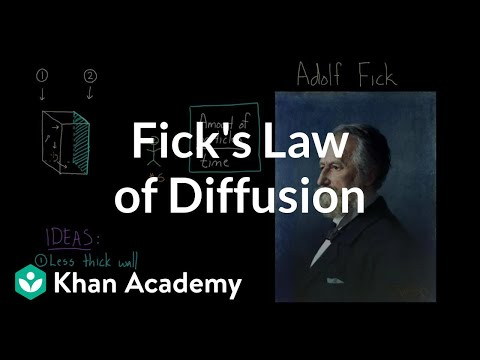

In [ ]:
#@title  Diffusion
#@markdown Learn the basics of Ficks law
from IPython.display import YouTubeVideo
YouTubeVideo('Cg4KlmI_acs', width=600, height=400)

## Calculation of Binary Diffusion Coefficient in Natural Gas

The binary diffusion coefficient, \(D_{AB}\), describes the rate of mass transfer between two components (A and B) due to molecular diffusion. In natural gas systems, understanding these coefficients is essential for processes like gas separation, gas mixing, and gas transport in porous media. Here are some widely accepted models:

### 1. Chapman-Enskog Theory:

This theory is based on kinetic gas theory and is applicable under low-pressure conditions where collisions between different gas molecules dominate.

$
D_{AB} = \frac{3\sqrt{k_B T}}{16\sqrt{\pi} P \sigma_{AB}^2 \Omega_D}
$

Where:
- $k_B$ = Boltzmann constant
- $T$= Absolute temperature
- $P$= Pressure
- $\sigma_{AB}$ = Collision diameter between molecules A and B
- $\Omega_D$ = Collision integral, which depends on temperature and is typically determined from tabulated data.

### 2. Fuller's Method:

Fuller and co-workers proposed an empirical correlation based on molecular weight and critical properties:

$
D_{AB} = \frac{0.00143 T^{1.75}}{P\left(\sum V_A^{1/3}\right)\left(\sum V_B^{1/3}\right)\sqrt{M_A + M_B}}
$

Where:
- $T$ = Absolute temperature
- $P$ = Pressure
- $V_A$ and $V_B$ = Molar volumes of gases A and B at their normal boiling points
- $M_A$ and $M_B$ = Molecular weights of gases A and B

### 3. Wilke-Lee Model:

This model is an empirical relation based on critical properties and acentric factors:

$
D_{AB} = \frac{7.4 x 10^{-8} T^{3/2}}{P M^{1/2} (T_c^{2/3} \omega^{1/2})}
$

Where:
- $T$ = Absolute temperature
- $P$= Pressure
- $M$= Average molecular weight
- $T_c$= Average critical temperature
- $\omega$ = Average acentric factor

### 4. Stokes-Einstein Relation:

This model is particularly used for systems involving larger molecules, like colloids:

$
D_{AB} = \frac{k_B T}{6\pi \eta r}
$

Where:
- $k_B$ = Boltzmann constant
- $T$ = Absolute temperature
- $\eta$ = Viscosity of the medium
- $r$ = Radius of the particle

---

**Note**: These models can provide initial estimates, but for precise calculations, experimental data is often necessary, especially at high pressures and temperatures. It's also essential to ensure the model's assumptions are consistent with your system's conditions.

## Calculation of diffusion coefficients in NeqSim
The following example shows how to calculate diffusion coefficients using neqsim.

In [ ]:
#@title Selecting diffusion coefficient models for  gases in NeqSim
#@markdown The following script calcluates the diffusion coeficient of methane in ethane using SRK in NeqSim using different methods.


fluid1 = fluid('cpa')
fluid1.addComponent('methane', 0.5)
fluid1.addComponent('water', 0.5)
fluid1.setTemperature(60.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)
#fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", method);
fluid1.initProperties()
print('mole fraction of water in gas ' , fluid1.getPhase('gas').getComponent('water').getx())
print('density of gas ',fluid1.getPhase('gas').getDensity('kg/m3'))
method = "CSP"
print("Diffusion coefficient ",  fluid1.getPhase('gas').getPhysicalProperties().getDiffusionCoefficient(0, 1), " m2/sec ", " metod: ", method)

method = "Wilke Lee"
#fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('gas').getPhysicalProperties().getDiffusionCoefficient(0, 1), " m2/sec ", " metod: ", method)

mole fraction of water in gas  0.020967658393448697
density of gas  5.874769525407652
Diffusion coefficient  4.158923743354382e-06  m2/sec   metod:  CSP
Diffusion coefficient  4.158923743354382e-06  m2/sec   metod:  Wilke Lee


In [ ]:
#@title Selecting diffusion coefficient models for  oils in NeqSim
#@markdown The following script calcluates the diffusion coeficient of n-hexane in n-heptane using SRK in NeqSim using different methods.


fluid1 = fluid('srk')
fluid1.addComponent('n-hexane', 0.5)
fluid1.addComponent('n-heptane', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)

method = "Siddiqi Lucas"
#fluid1.getInterphaseProperties().setDiffusionCoefficientModel("oil", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('oil').getPhysicalProperties().getDiffusionCoefficient(0, 1), " m2/sec ", " metod: ", method)

Diffusion coefficient  inf  m2/sec   metod:  Siddiqi Lucas


In [ ]:
#@title Selecting diffusion coefficient models for aqueous fluids in NeqSim
#@markdown The following script calcluates the diffusion coeficient of water in amine (MDEA) using SRK in NeqSim using different methods.


fluid1 = fluid('srk')
fluid1.addComponent('water', 0.5)
fluid1.addComponent('MDEA', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)

method = "Alkanol amines"
#fluid1.getInterphaseProperties().setDiffusionCoefficientModel("oil", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('aqueous').getPhysicalProperties().getDiffusionCoefficient(0, 1), " m2/sec ", " metod: ", method)

Diffusion coefficient  2.0939212488531034e-10  m2/sec   metod:  Alkanol amines


In [ ]:
  SystemInterface testSystem = new SystemSrkEos(273.15 + 28.66, 12.2);
        testSystem.addComponent("nitrogen", 0.037);
        testSystem.addComponent("n-heptane", 0.475);
        testSystem.addComponent("water", 0.475);

        testSystem.createDatabase(true);
        testSystem.setMixingRule(2);
        testSystem.setMultiPhaseCheck(true);

        ThermodynamicOperations testOps = new ThermodynamicOperations(testSystem);
        try {
            testOps.TPflash();
            testSystem.display();
        } catch (Exception e) {
            logger.error(e.toString());
        }

     System.out.println("binary diffusion coefficient water in nitrogen gas " + testSystem.getPhase("gas").getPhysicalProperties().getDiffusionCoefficient("water", "nitrogen") + " m2/sec");
     System.out.println("binary diffusion coefficient nitrogen in liquid n-heptane " + testSystem.getPhase("oil").getPhysicalProperties().getDiffusionCoefficient("nitrogen", "n-heptane") + " m2/sec");
     System.out.println("binary diffusion coefficient nitrogen in water " + testSystem.getPhase("aqueous").getPhysicalProperties().getDiffusionCoefficient("nitrogen", "water") + " m2/sec");

     System.out.println("effective diffusion coefficient water in gas " + testSystem.getPhase("gas").getPhysicalProperties().getEffectiveDiffusionCoefficient("water") + " m2/sec");
     System.out.println("effective diffusion coefficient nitrogen in liquid n-heptane " + testSystem.getPhase("oil").getPhysicalProperties().getEffectiveDiffusionCoefficient("nitrogen") + " m2/sec");
     System.out.println("effective diffusion coefficient nitrogen in water " + testSystem.getPhase("aqueous").getPhysicalProperties().getEffectiveDiffusionCoefficient("nitrogen") + " m2/sec");


IndentationError: ignored